In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/computer-science-students-career-prediction/cs_students.csv


In [58]:
df = pd.read_csv('/kaggle/input/computer-science-students-career-prediction/cs_students.csv')

In [59]:
df.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [61]:
df.shape

(180, 12)

In [62]:
df.drop(columns=['Student ID','Name','Major','Projects'], axis = 1, inplace = True)

In [79]:
df.head(3)

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,Male,21,3.5,Artificial Intelligence,Machine Learning Researcher,Strong,Strong,Weak
1,Female,20,3.2,Data Science,Data Scientist,Average,Strong,Weak
2,Male,22,3.8,Software Development,Software Engineer,Strong,Strong,Average


In [63]:
df.isnull().sum()

Gender               0
Age                  0
GPA                  0
Interested Domain    0
Future Career        0
Python               0
SQL                  0
Java                 0
dtype: int64

In [65]:
df.describe()

,Age,GPA
count,180.000000,180.000000
mean,22.116667,3.615000
std,2.823040,0.177341
min,20.000000,3.200000
25%,21.000000,3.500000
50%,22.000000,3.600000
75%,22.250000,3.700000
max,37.000000,3.900000


# Visualization

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns

Index(['Gender', 'Age', 'GPA', 'Interested Domain', 'Future Career', 'Python',
       'SQL', 'Java'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

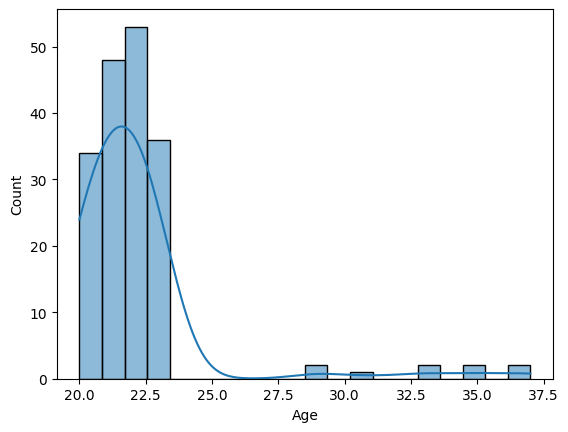

In [67]:
sns.histplot(df['Age'], bins = 20, kde = True)

<Axes: xlabel='Gender', ylabel='count'>

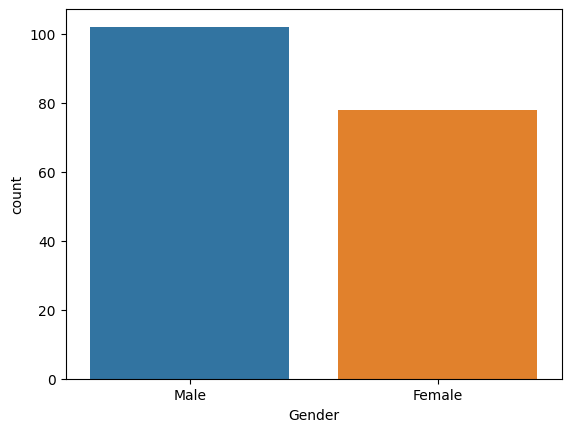

In [68]:
sns.countplot(x  = 'Gender' , data = df)

<Axes: xlabel='Gender', ylabel='GPA'>

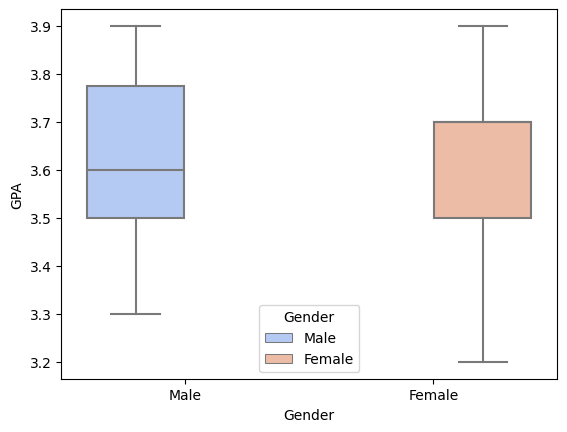

In [69]:
sns.boxplot(x = 'Gender', y = 'GPA', data = df, hue = 'Gender', palette = 'coolwarm')

In [70]:
df_interest = df['Interested Domain'].value_counts().sort_values(ascending=False).head(10)

<Axes: ylabel='Interested Domain'>

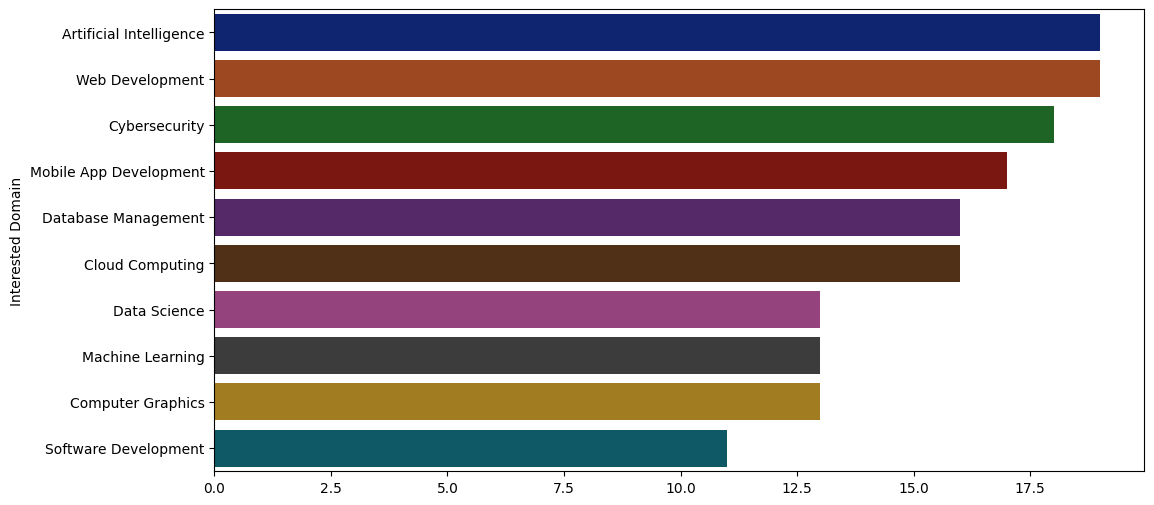

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x = df_interest.values, y  = df_interest.index, palette = 'dark')

In [72]:
df_future = df['Future Career'].value_counts().sort_values(ascending=False).head(10)

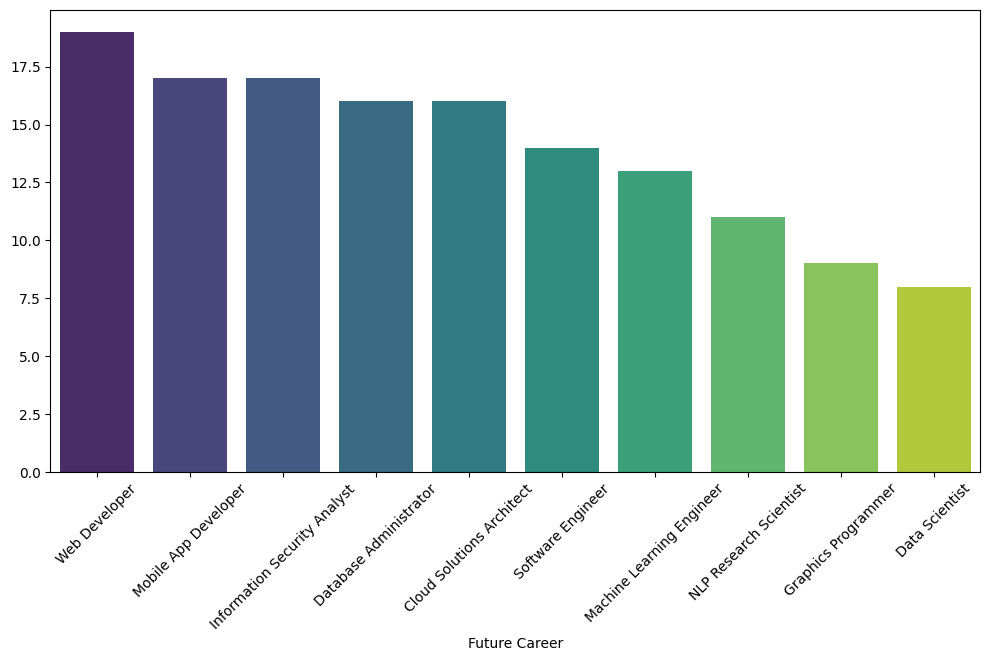

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x = df_future.index, y  = df_future.values, palette = 'viridis')
plt.xticks(rotation = 45)
plt.show()

# Prediction

In [74]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Converting categorical variables to numerical variables

In [82]:
enc_col = ['Gender','Interested Domain','Python','SQL','Java']

encoder = LabelEncoder()
for col in enc_col:
    df[col] = encoder.fit_transform(df[col])
df.head()  

,Gender,Age,GPA,Interested Domain,Future Career,Python,SQL,Java
0,1,21,3.5,0,Machine Learning Researcher,1,1,2
1,0,20,3.2,10,Data Scientist,0,1,2
2,1,22,3.8,24,Software Engineer,1,1,0
3,0,21,3.7,26,Web Developer,2,1,1
4,1,23,3.4,7,Information Security Analyst,0,2,1


In [83]:
x = df.drop('Future Career', axis = 1)
y = df['Future Career']

# Standardizing the features

In [89]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
x_train.shape,x_test.shape

((144, 7), (36, 7))

# Training the Model

# **Logistic regression**

In [96]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5902777777777778

In [97]:
lr.score(x_test,y_test)

0.3611111111111111

# Decision Tree

In [98]:
dt = DecisionTreeClassifier()

In [99]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9930555555555556

In [100]:
dt.score(x_test,y_test)

0.8611111111111112

# 86.11% acc in Decision Tree :0

# Random Forest

In [102]:
rfc = RandomForestClassifier()

In [103]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
rfc.score(x_test,y_test)

0.6944444444444444